## **Tarea 4**

Jhon Wilmer Pino Román  
1017269052  
Ecuaciones Diferenciales II
Profesor: Carlos Piedrahita  
Computación Científica - Facultad de Ciencias Básicas    
Universidad de Medellín  - 2022-2


Queremos hallar una solución para la siguiente ecuación diferencial

$$ \\ -\nabla^2 u = 1 \\ $$


* Contribuciones locales de $A$:

$$ \\ A^{(k)}_{\text{local}, i, j} = \frac{1}{2} \text{det}(F) \left( \frac{\partial \phi_{\text{local}, i} }{\partial x} \frac{\partial \phi_{\text{local}, j} }{\partial x} + \frac{\partial \phi_{\text{local}, i} }{\partial y} \frac{\partial \phi_{\text{local}, j} }{\partial y} \right) \\ $$

* Contribuciones locales de $b$:

$$ b^{(k)}_{\text{local}, i} = \frac{1}{6} \text{det}(F) \\ $$



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Calculo de contribuciones locales A y b
def ContributionOnElements(l_nodes, l_coord, k):
  Alocal = np.zeros((3, 3)); blocal = np.zeros(3)
  dphis_x = [-1, 1, 0]
  dphis_y = [-1, 0, 1]
  x1 = l_coord[l_nodes[k][0]-1][0]
  y1 = l_coord[l_nodes[k][0]-1][1]
  x2 = l_coord[l_nodes[k][1]-1][0]
  y2 = l_coord[l_nodes[k][1]-1][1]
  x3 = l_coord[l_nodes[k][2]-1][0]
  y3 = l_coord[l_nodes[k][2]-1][1]
  detF = (x2 - x1)*(y3 - y1) - (x3 - x1)*(y2 - y1)
  for i in range(3):
    for j in range(3):
      Alocal[i, j] = (1/2)*detF*(dphis_x[i]*dphis_x[j] + dphis_y[i]*dphis_y[j])
    blocal[i] = (1/6)*detF
  return Alocal, blocal

# Ensamblaje de la matriz A global y el vector b global


In [ ]:
def equationSolution(l_nodes, l_coord, elements, dir_cond='NaN'):
  AG = np.zeros((elements, elements))
  bG = np.zeros(elements)
  i1=0; j1=0
  for k in range(elements):
    Al, bl = ContributionOnElements(l_nodes, l_coord, k)
    for i in np.sort(l_nodes[k])-1:
      for j in np.sort(l_nodes[k])-1:
        AG[i, j] = AG[i, j] + Al[i1, j1]; j1+=1
      bG[i] = bG[i] + bl[i1]
      i1+=1; j1=0
    i1=0; j1=0
  if dir_cond != 'NaN':
    for dc in dir_cond:
      AG[dc[0]-1, 0:] = 0; AG[dc[0]-1, dc[0]-1] = 1
      bG[dc[0]-1] = dc[1]
  return np.linalg.solve(AG, bG), AG

Veamos la solución del sistema teniendo en cuenta los nodos de cada elemento triangular, las coordenadas de los nodos y las condiciones de dirichlet establecidas en el problema:

In [ ]:
test_conditions = [[1, 0], [2, 0], [3, 0], [6, 0], [9, 0], [12, 0], [11, 0], [10, 0], [7, 0], [4, 0]]


x = np.linspace(0.0, 1.0, 3)
y = np.linspace(0.0, 1.0, 4)


coords=[]
for y1 in y:
  for x1 in x:
    coords.append([x1, y1])

# lista de nodos de prueba
test_nodes = [[1, 2, 4],
              [5, 4, 2],
              [2, 3, 5],
              [6, 5, 3],
              [4, 5, 7],
              [8, 7, 5],
              [5, 6, 8],
              [9, 8, 6],
              [7, 8, 10],
              [11, 10, 8],
              [8, 9, 11],
              [12, 11, 9]]

# aproximacion por elementos finitos
U = equationSolution(test_nodes, coords, 12, dir_cond=test_conditions)

Finalmente, haciendo uso de la librería de graficación 3D veamos la superficie obtenida como resultado de la aproximación:

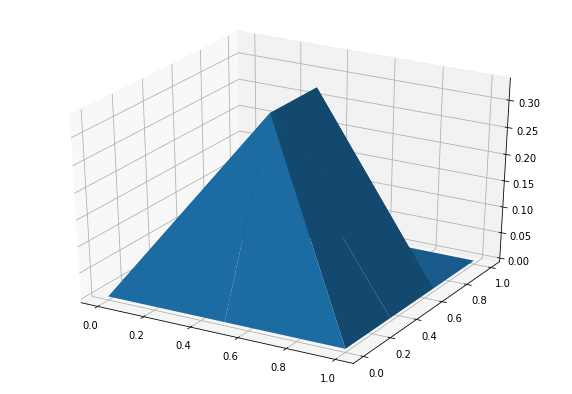

In [ ]:
# Se crea la cuadricula en el plano
X, Y = np.meshgrid(x, y)
xp, yp = X.flatten(), Y.flatten()

# Figura sobre la cual se hara el plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(projection='3d')

# plot de la superficie
ax.plot_trisurf(xp, yp, U); plt.show()

In [ ]:
U = equationSolution(test_nodes, coords, 12, dir_cond=test_conditions)
matriz = U[1]

In [ ]:
matriz

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.16666667, -0.08333333, -0.08333333,  0.66666667,
        -0.08333333, -0.08333333, -0.16666667,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  